In [873]:
# importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore
import contextily as ctx


# Data cleaning

In [874]:
# # defining the file paths for the datasets
# customers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_customers_dataset.csv"
# geolocation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_geolocation_dataset.csv"
# order_items = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_items_dataset.csv"
# order_payments = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_payments_dataset.csv"
# order_reviews = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_order_reviews_dataset.csv"
# orders = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_orders_dataset.csv"
# products = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_products_dataset.csv"
# sellers = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/olist_sellers_dataset.csv"
# product_category_name_translation = "C:/Users/Marcus/Documents/NYP/NYPY3/Y3S1/EGT309 AI Solution Development/data/product_category_name_translation.csv"

In [875]:
# defining the file paths for the datasets
customers = "X:/data/olist_customers_dataset.csv"
geolocation = "X:/data/olist_geolocation_dataset.csv"
order_items = "X:/data/olist_order_items_dataset.csv"
order_payments = "X:/data/olist_order_payments_dataset.csv"
order_reviews = "X:/data/olist_order_reviews_dataset.csv"
orders = "X:/data/olist_orders_dataset.csv"
products = "X:/data/olist_products_dataset.csv"
sellers = "X:/data/olist_sellers_dataset.csv"
product_category_name_translation = "X:/data/product_category_name_translation.csv"


In [876]:
customers_df = pd.read_csv(customers, on_bad_lines='skip')
geolocation_df = pd.read_csv(geolocation, on_bad_lines='skip')
order_items_df = pd.read_csv(order_items, on_bad_lines='skip')
order_payments_df = pd.read_csv(order_payments, on_bad_lines='skip')
order_reviews_df = pd.read_csv(order_reviews, on_bad_lines='skip')
orders_df = pd.read_csv(orders, on_bad_lines='skip')
products_df = pd.read_csv(products, on_bad_lines='skip')
sellers_df = pd.read_csv(sellers, on_bad_lines='skip')
product_category_name_translation_df = pd.read_csv(product_category_name_translation, on_bad_lines='skip')

In [877]:
# defining functions to clean and preprocess the data
def checkingforduplinull(df, name="DataFrame"):
    print(f"Checking for duplicates and null values in `{name}`...")
    print(f"Duplicates: {df.duplicated().sum()}")
    print(f"Null values: {df.isnull().sum().sum()}")
    print("\n")

In [878]:
dataset = {
    'customers_df': customers_df,
    'geolocation_df': geolocation_df,
    'order_items_df': order_items_df,
    'order_payments_df': order_payments_df,
    'order_reviews_df': order_reviews_df,
    'orders_df': orders_df,
    'products_df': products_df,
    'sellers_df': sellers_df,
    'product_category_name_translation_df': product_category_name_translation_df
}

In [879]:
#checking for duplicates and null values in each DataFrame
checkingforduplinull(customers_df, "customers_df")
checkingforduplinull(geolocation_df, "geolocation_df")
checkingforduplinull(order_items_df, "order_items_df")
checkingforduplinull(order_payments_df, "order_payments_df")
checkingforduplinull(order_reviews_df, "order_reviews_df")
checkingforduplinull(orders_df, "orders_df")
checkingforduplinull(products_df, "products_df")
checkingforduplinull(sellers_df, "sellers_df")
checkingforduplinull(product_category_name_translation_df, "product_category_name_translation_df")

Checking for duplicates and null values in `customers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `geolocation_df`...
Duplicates: 261831
Null values: 0


Checking for duplicates and null values in `order_items_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_payments_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `order_reviews_df`...
Duplicates: 0
Null values: 145903


Checking for duplicates and null values in `orders_df`...
Duplicates: 0
Null values: 4908


Checking for duplicates and null values in `products_df`...
Duplicates: 0
Null values: 2448


Checking for duplicates and null values in `sellers_df`...
Duplicates: 0
Null values: 0


Checking for duplicates and null values in `product_category_name_translation_df`...
Duplicates: 0
Null values: 0




duplicates are normal as one place can have multiple orders.

## Order_reviews

In [880]:
order_reviews_df.isnull().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
dtype: int64

### review_id column

In [881]:
order_reviews_df[order_reviews_df['review_id'].duplicated()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
3317,3242cc306a9218d0377831e175d62fbf,9c5bfba7de6a4abbb6ba0baab78d1622,5,NaN,Ótimo,2017-07-21 00:00:00,2017-07-22 01:06:37
5719,308316408775d1600dad81bd3184556d,3fe4dbcdb046a475dbf25463c1ca78bd,5,NaN,Ajudem a rastrear uma das 3 prateleiras que fa...,2017-09-07 00:00:00,2017-09-11 09:58:09
7213,8ee90ac383cf825bb7f4756130d4e74a,75d5d3d16567a27eefc5752aeb063072,5,NaN,recomendo,2017-05-30 00:00:00,2017-06-02 18:16:17
7805,d433c252647c51309432ca0b763f969b,191abde9c3bf77d1ce67d100d8db6d15,1,NaN,NaN,2017-09-03 00:00:00,2017-09-06 16:11:00
9013,03a6a25db577d0689440933055111897,3fde8b7313af6b37b84b5c7594d7add0,5,NaN,Muito Bom! Gostei Bastante! Tecido Ótimo! Aten...,2017-12-15 00:00:00,2017-12-16 01:32:18


In [882]:
# Remove duplicates based on 'review_id' and keeping the first occurrence
order_reviews_df = order_reviews_df.drop_duplicates(subset='review_id', keep='first')


### order_id column

In [883]:
order_reviews_df[order_reviews_df['order_id'].duplicated()].head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
1119,46abf3ea0b2710ad41390fdb79c32d84,5040757d4e06a4be96d3827b860b4e7c,5,NaN,NaN,2017-11-07 00:00:00,2017-11-10 20:07:48
3109,aa193e76d35950c4ae988237bb36ed2b,cf73e2cb1f4a9480ed70c154da3d954a,5,NaN,NaN,2018-01-18 00:00:00,2018-01-18 17:36:45
8108,40294ea5a778dc62080d6b3f55d361ce,e1bc1083cd7acd30d0576335373b907d,5,NaN,NaN,2018-03-23 00:00:00,2018-03-24 00:23:06
9064,32e2c7e889f7a185d462265398ee3631,c7cfea0c153e6382e32e84c2a9dd7d2e,5,NaN,NaN,2017-10-21 00:00:00,2017-10-22 00:47:25
9795,95a3135743556b117d888cc8c6e12e11,f9c78e6e58306dc81efbbada1ac11f24,3,NaN,O produto chegou antes do prazo mas recebi um ...,2017-09-14 00:00:00,2017-09-17 11:14:08


In [884]:
# Remove duplicates based on 'order_id' and keeping the first occurrence
order_reviews_df = order_reviews_df.drop_duplicates(subset='order_id', keep='first')

### review_score column


In [885]:
# Find rows where review_score is not between 1 and 5
out_of_range_reviews = order_reviews_df[(order_reviews_df['review_score'] < 1) | (order_reviews_df['review_score'] > 5)]
out_of_range_reviews

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp


### Comments columns

In [886]:
# finding which column null values appear in the order_reviews DataFrame
order_reviews_df.isnull().sum()


review_id                      0
order_id                       0
review_score                   0
review_comment_title       86654
review_comment_message     57585
review_creation_date           0
review_answer_timestamp        0
dtype: int64

In [887]:
# order_reviews_df dataset
order_reviews_df.head()

,review_id,order_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,7bc2406110b926393aa56f80a40eba40,73fc7af87114b39712e6da79b0a377eb,4,NaN,NaN,2018-01-18 00:00:00,2018-01-18 21:46:59
1,80e641a11e56f04c1ad469d5645fdfde,a548910a1c6147796b98fdf73dbeba33,5,NaN,NaN,2018-03-10 00:00:00,2018-03-11 03:05:13
2,228ce5500dc1d8e020d8d1322874b6f0,f9e4b658b201a9f2ecdecbb34bed034b,5,NaN,NaN,2018-02-17 00:00:00,2018-02-18 14:36:24
3,e64fb393e7b32834bb789ff8bb30750e,658677c97b385a9be170737859d3511b,5,NaN,Recebi bem antes do prazo estipulado.,2017-04-21 00:00:00,2017-04-21 22:02:06
4,f7c4243c7fe1938f181bec41a392bdeb,8e6bfb81e283fa7e4f11123a3fb894f1,5,NaN,Parabéns lojas lannister adorei comprar pela I...,2018-03-01 00:00:00,2018-03-02 10:26:53


we will also leave order_reviews_df alone as review comment titles and message are not crucial.

## Geolocation_df

In [888]:
geolocation_df.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state
0,1037,-23.545621,-46.639292,sao paulo,SP
1,1046,-23.546081,-46.644820,sao paulo,SP
2,1046,-23.546129,-46.642951,sao paulo,SP
3,1041,-23.544392,-46.639499,sao paulo,SP
4,1035,-23.541578,-46.641607,sao paulo,SP


In [889]:
# # plotting lat against lng from geolocation_df
# plt.figure(figsize=(10, 6))
# plt.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"], alpha=0.6, edgecolors='k')
# plt.title("Geolocation Scatter Plot (Lat vs Lng)")
# plt.xlabel("Longitude")
# plt.ylabel("Latitude")
# plt.grid(True)
# plt.tight_layout()
# plt.show()

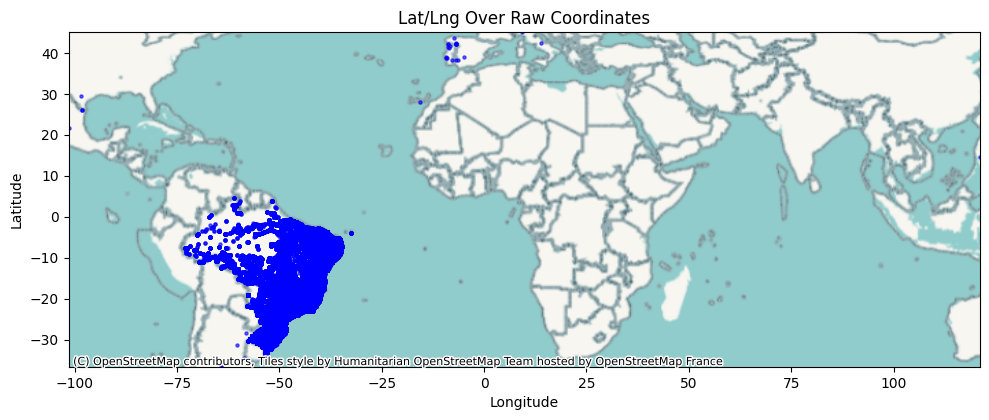

In [890]:
# Create a blank plot with lat/lng
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(geolocation_df["geolocation_lng"], geolocation_df["geolocation_lat"],
           s=5, color='blue', alpha=0.6)

# Set correct bounds for map tiles
ax.set_xlim(geolocation_df["geolocation_lng"].min(), geolocation_df["geolocation_lng"].max())
ax.set_ylim(geolocation_df["geolocation_lat"].min(), geolocation_df["geolocation_lat"].max())

# Adjust the aspect ratio to be equal so that latitude and longitude scales match
ax.set_aspect('equal')

# Try to overlay map (may not align perfectly without reprojecting)
try:
    ctx.add_basemap(ax, crs='EPSG:4326')  # using raw lat/lng coords
except Exception as e:
    print("Map overlay failed:", e)

ax.set_title("Lat/Lng Over Raw Coordinates")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [891]:
# Calculate z-scores for latitude and longitude
geolocation_df["lat_z"] = zscore(geolocation_df["geolocation_lat"])
geolocation_df["lng_z"] = zscore(geolocation_df["geolocation_lng"])

# Set a threshold (e.g. 3 standard deviations from the mean)
threshold = 10

# Identify rows where either lat or lng z-score is above the threshold
outliers = geolocation_df[(geolocation_df["lat_z"].abs() > threshold) | (geolocation_df["lng_z"].abs() > threshold)]

# Drop the z-score columns if not needed
geolocation_df.drop(columns=["lat_z", "lng_z"], inplace=True)

# Display the outliers
outliers.head()

,geolocation_zip_code_prefix,geolocation_lat,geolocation_lng,geolocation_city,geolocation_state,lat_z,lng_z
513631,28165,41.614052,-8.411675,vila nova de campos,RJ,10.985253,8.894877
513754,28155,42.439286,13.820214,santa maria,RJ,11.129629,14.101718
514429,28333,38.381672,-6.328200,raposo,RJ,10.419742,9.382839
516682,28595,43.684961,-7.411080,portela,RJ,11.347562,9.129222
538512,29654,29.409252,-98.484121,santo antônio do canaã,ES,8.850002,-12.200627


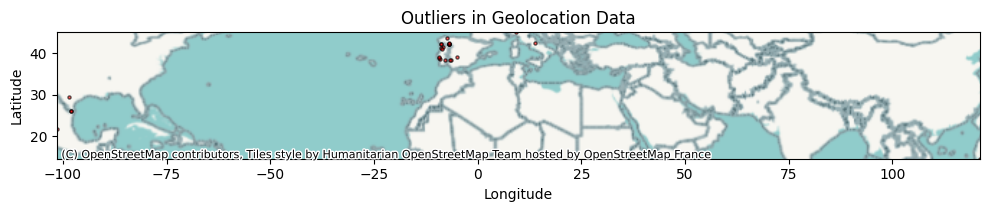

In [892]:
# Create a blank plot with lat/lng for outliers
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(outliers["geolocation_lng"], outliers["geolocation_lat"],
           s=5, color='red', edgecolors='k', alpha=0.6)

# Set correct bounds for map tiles based on outliers data
ax.set_xlim(outliers["geolocation_lng"].min(), outliers["geolocation_lng"].max())
ax.set_ylim(outliers["geolocation_lat"].min(), outliers["geolocation_lat"].max())

# Adjust the aspect ratio to be equal so that latitude and longitude scales match
ax.set_aspect('equal')

# Try to overlay the map for outliers (may not align perfectly without reprojecting)
try:
    ctx.add_basemap(ax, crs='EPSG:4326')  # using raw lat/lng coords
except Exception as e:
    print("Map overlay failed:", e)

# Title and labels
ax.set_title("Outliers in Geolocation Data")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.tight_layout()
plt.show()

In [893]:
# removing outliers from the geolocation DataFrame
geolocation_df = geolocation_df.drop(outliers.index)


## Orders_df

In [894]:
# finding the number of null values in each column of the orders DataFrame
orders_df.isnull().sum()

order_id                            0
customer_id                         0
order_status                        0
order_purchase_timestamp            0
order_approved_at                 160
order_delivered_carrier_date     1783
order_delivered_customer_date    2965
order_estimated_delivery_date       0
dtype: int64

### order_id column

In [895]:
orders_df[orders_df['order_id'].duplicated()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### customer_id column

In [896]:
orders_df[orders_df['customer_id'].duplicated()].head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date


### Unfilled empty data

In [897]:
# rows that do not have "delivered" in the order_status column
non_delivered = orders_df[orders_df['order_status'] != 'delivered']
non_delivered.head()

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
6,136cce7faa42fdb2cefd53fdc79a6098,ed0271e0b7da060a393796590e7b737a,invoiced,2017-04-11 12:22:08,2017-04-13 13:25:17,NaN,NaN,2017-05-09 00:00:00
44,ee64d42b8cf066f35eac1cf57de1aa85,caded193e8e47b8362864762a83db3c5,shipped,2018-06-04 16:44:48,2018-06-05 04:31:18,2018-06-05 14:32:00,NaN,2018-06-28 00:00:00
103,0760a852e4e9d89eb77bf631eaaf1c84,d2a79636084590b7465af8ab374a8cf5,invoiced,2018-08-03 17:44:42,2018-08-07 06:15:14,NaN,NaN,2018-08-21 00:00:00
128,15bed8e2fec7fdbadb186b57c46c92f2,f3f0e613e0bdb9c7cee75504f0f90679,processing,2017-09-03 14:22:03,2017-09-03 14:30:09,NaN,NaN,2017-10-03 00:00:00
154,6942b8da583c2f9957e990d028607019,52006a9383bf149a4fb24226b173106f,shipped,2018-01-10 11:33:07,2018-01-11 02:32:30,2018-01-11 19:39:23,NaN,2018-02-07 00:00:00


In [898]:
# unfilled/null rows even with "delivered" status
delivered_with_nulls = orders_df[
    (orders_df['order_status'] == 'delivered') &
    (orders_df.isnull().any(axis=1))
]

delivered_with_nulls.head()


,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
3002,2d1e2d5bf4dc7227b3bfebb81328c15f,ec05a6d8558c6455f0cbbd8a420ad34f,delivered,2017-11-28 17:44:07,2017-11-28 17:56:40,2017-11-30 18:12:23,NaN,2017-12-18 00:00:00
5323,e04abd8149ef81b95221e88f6ed9ab6a,2127dc6603ac33544953ef05ec155771,delivered,2017-02-18 14:40:00,NaN,2017-02-23 12:04:47,2017-03-01 13:25:33,2017-03-17 00:00:00
16567,8a9adc69528e1001fc68dd0aaebbb54a,4c1ccc74e00993733742a3c786dc3c1f,delivered,2017-02-18 12:45:31,NaN,2017-02-23 09:01:52,2017-03-02 10:05:06,2017-03-21 00:00:00
19031,7013bcfc1c97fe719a7b5e05e61c12db,2941af76d38100e0f8740a374f1a5dc3,delivered,2017-02-18 13:29:47,NaN,2017-02-22 16:25:25,2017-03-01 08:07:38,2017-03-17 00:00:00
20618,f5dd62b788049ad9fc0526e3ad11a097,5e89028e024b381dc84a13a3570decb4,delivered,2018-06-20 06:58:43,2018-06-20 07:19:05,2018-06-25 08:05:00,NaN,2018-07-16 00:00:00


In [899]:
# Dropping unfilled rows even with "delivered" status
orders_df = orders_df.drop(delivered_with_nulls.index)


the other null values in "orders_df" are normal due to their respective "order_status"

## products_df

In [900]:
# checking for null values in the products DataFrame columns
products_df.isnull().sum()

product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

### product_id column

In [ ]:
# finding duplicate product IDs in the products DataFrame
products_df[products_df['product_id'].duplicated()].head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm


### product_category_name column

In [902]:
# checking for null values in the products DataFrame
empty_product_name = products_df[products_df['product_category_name'].isnull()]
product_ids_to_remove = empty_product_name['product_id']
product_ids_to_remove

105      a41e356c76fab66334f36de622ecbd3a
128      d8dee61c2034d6d075997acef1870e9b
145      56139431d72cd51f19eb9f7dae4d1617
154      46b48281eb6d663ced748f324108c733
197      5fb61f482620cb672f5e586bb132eae9
                       ...               
32515    b0a0c5dd78e644373b199380612c350a
32589    10dbe0fbaa2c505123c17fdc34a63c56
32616    bd2ada37b58ae94cc838b9c0569fecd8
32772    fa51e914046aab32764c41356b9d4ea4
32852    c4ceee876c82b8328e9c293fa0e1989b
Name: product_id, Length: 610, dtype: object

In [903]:
#defining removing product_id
def remove_product_ids(df):
    # removing the rows with product_id
    df = df[~df['product_id'].isin(product_ids_to_remove)]
    return df

In [904]:
# removing rows with null values in 'product_category_name
remove_product_ids(products_df)
products_df.head()


,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


### outliers, (missing last 4 columns)

In [905]:
# finding the 2 outliers, 2 null values in product_weight_g, product_length_cm, product_height_cm and product_width_cm
empty = products_df[products_df['product_weight_g'].isnull()]
empty

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
8578,09ff539a621711667c43eba6a3bd8466,bebes,60.0,865.0,3.0,NaN,NaN,NaN,NaN
18851,5eb564652db742ff8f28759cd8d2652a,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [906]:
# Add a new product_id to the product_ids_to_remove series using concat
product_ids_to_remove = pd.concat([product_ids_to_remove, pd.Series(['09ff539a621711667c43eba6a3bd8466'])], ignore_index=True)


In [907]:
# removing the row with null values in product_weight_g, product_length_cm, product_height_cm and product_width_cm
remove_product_ids(products_df)
products_df.head()

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0
3,cef67bcfe19066a932b7673e239eb23d,bebes,27.0,261.0,1.0,371.0,26.0,4.0,26.0
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas,37.0,402.0,4.0,625.0,20.0,17.0,13.0


In [908]:
#removing the row with product_id = 5eb564652db742ff8f28759cd8d2652a
products_df = remove_product_ids(products_df)
order_items_df = remove_product_ids(order_items_df)



## customers_df

In [909]:
# checking for null values in the customers_df DataFrame columns
customers_df.isnull().sum()

customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

### customer_id column

In [910]:
#checking for duplicate customer_id in customers_df
customers_df[customers_df['customer_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state


### customer_unique_id

In [911]:
# checking for duplicate customer_unique_id in customers_df
customers_df[customers_df['customer_unique_id'].duplicated()]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
679,c57b4b6f3719475543b721e720a526ad,b6c083700ca8c135ba9f0f132930d4e8,8686,suzano,SP
1463,9f6f3da49e2d46e3a7529f5e3c25ecce,a40096fc0a3862e9e12bc55b5f8e6ab2,20561,rio de janeiro,RJ
1607,299f7b5125c8fbe1761a1b320c34fc7d,b8b3c435a58aebd788a477bed8342910,95585,arroio do sal,RS
2811,226d59f9f4b98e228b689eea45d03a6d,66980c3775537536f77b434d74e520f5,30290,belo horizonte,MG
3198,b1253701171dfb298f52a221f824e45b,788313d21c3507fe890921f6e17aa679,11070,santos,SP
...,...,...,...,...,...
99324,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG
99327,c1affa46f9f3b514555259049a0307b9,12ab9334b1240d6d037f2b0102a49571,38050,uberaba,MG
99336,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP
99353,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES


Having duplicates on this "customer_unique_id" is normal as this mean that one customer has repeatedly shopped at Olist

## order_items_df

In [912]:
# checking for null values in the order_items DataFrame columns
order_items_df.isnull().sum()

order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

### order_id, order_item_id, product_id column

In [913]:
# checking for duplicate order_id in order_items_df
order_items_df[order_items_df['order_id'].duplicated()].head()

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.90,13.37
33,00143d0f86d6fbd9f9b38ab440ac16f5,2,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
34,00143d0f86d6fbd9f9b38ab440ac16f5,3,e95ee6822b66ac6058e2e4aff656071a,a17f621c590ea0fab3d5d883e1630ec6,2017-10-20 16:07:52,21.33,15.10
43,001ab0a7578dd66cd4b0a71f5b6e1e41,2,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63
44,001ab0a7578dd66cd4b0a71f5b6e1e41,3,0b0172eb0fd18479d29c3bc122c058c2,5656537e588803a555b8eb41f07a944b,2018-01-04 02:33:42,24.89,17.63


In [914]:
# Group by 'order_id' and 'product_id' and get the row with the highest 'order_item_id'
order_items_df = order_items_df.loc[order_items_df.groupby(['order_id', 'product_id'])['order_item_id'].idxmax()]

# Display the cleaned DataFrame
order_items_df.head()


,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


In [988]:
# Rename 'order_item_id' to 'quantity'
order_items_df = order_items_df.rename(columns={'order_item_id': 'quantity'})
order_items_df.head()

,order_id,quantity,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14


## order_payments_df

In [989]:
# checking for null values in the order_payments DataFrame columns
order_payments_df.isnull().sum()

order_id                0
payment_sequential      0
payment_type            0
payment_installments    0
payment_value           0
is_voucher              0
dtype: int64

In [ ]:
# checking for duplicate order_id in order_payments_df
order_payments_df[order_payments_df['order_id'].duplicated()].head()

,order_id,total_payment,voucher_used,payment_type,voucher_count


### Revamping the dataset to fit for our use.

In [991]:
# Add a new column to identify if the payment_type is 'voucher'
order_payments_df['is_voucher'] = order_payments_df['payment_type'] == 'voucher'

# Count the number of vouchers for each 'order_id'
voucher_counts = order_payments_df[order_payments_df['is_voucher']].groupby('order_id').size().reset_index(name='voucher_count')

# Perform aggregation and keep 'payment_type' as well
orderpaymentmerge = order_payments_df.groupby('order_id').agg({
    'payment_value': 'sum',         # Total payment for the order
    'is_voucher': 'any',            # Whether any voucher was used in the order
    'payment_type': 'first'         # Keep the first 'payment_type' for each 'order_id'
}).reset_index()

# Rename columns
orderpaymentmerge.rename(columns={
    'payment_value': 'total_payment',
    'is_voucher': 'voucher_used'
}, inplace=True)

# Merge with voucher counts to get the number of vouchers used per order
orderpaymentmerge = pd.merge(orderpaymentmerge, voucher_counts, on='order_id', how='left')

# Fill missing 'voucher_count' values with 0 and convert to integer
orderpaymentmerge['voucher_count'] = orderpaymentmerge['voucher_count'].fillna(0).astype(int)

# Display the final result
order_payments_df = orderpaymentmerge
order_payments_df.head()


,order_id,total_payment,voucher_used,payment_type,voucher_count
0,00010242fe8c5a6d1ba2dd792cb16214,72.19,False,credit_card,0
1,00018f77f2f0320c557190d7a144bdd3,259.83,False,credit_card,0
2,000229ec398224ef6ca0657da4fc703e,216.87,False,credit_card,0
3,00024acbcdf0a6daa1e931b038114c75,25.78,False,credit_card,0
4,00042b26cf59d7ce69dfabb4e55b4fd9,218.04,False,credit_card,0


## product_category_name_translation_df

In [ ]:
# checking for null values in the product_category_name_translation_df columns
product_category_name_translation_df.isnull().sum()

product_category_name            0
product_category_name_english    0
dtype: int64

In [995]:
#checking for duplicate product_category_name in product_category_name_translation_df
product_category_name_translation_df[product_category_name_translation_df['product_category_name'].duplicated()].head()

,product_category_name,product_category_name_english


In [996]:
# checking for duplicate product_category_name_english in product_category_name_translation_df
product_category_name_translation_df[product_category_name_translation_df['product_category_name_english'].duplicated()].head()

,product_category_name,product_category_name_english


# Exporting the cleaned datasets

In [918]:
# # Export cleaned dataframes to the cleaned_data directory
# customers_df.to_csv('cleaned_data/cleaned_customers.csv', index=False)
# geolocation_df.to_csv('cleaned_data/cleaned_geolocation.csv', index=False)
# order_items_df.to_csv('cleaned_data/cleaned_order_items.csv', index=False)
# order_payments_df.to_csv('cleaned_data/cleaned_order_payments.csv', index=False)
# order_reviews_df.to_csv('cleaned_data/cleaned_order_reviews.csv', index=False)
# orders_df.to_csv('cleaned_data/cleaned_orders.csv', index=False)
# products_df.to_csv('cleaned_data/cleaned_products.csv', index=False)
# sellers_df.to_csv('cleaned_data/cleaned_sellers.csv', index=False)
# product_category_name_translation_df.to_csv('cleaned_data/cleaned_product_category_name_translation.csv', index=False)


# Merge Section (id needed)

To merge the datasets, IDs need to be unique.
Merging data and Adding New columns:

In [919]:
customers_df_returningcustomer=customers_df.copy()
customers_df_returningcustomer

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP
...,...,...,...,...,...
99436,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP
99437,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP
99438,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE
99439,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS


In [920]:
customers_df_returningcustomer.columns = (
    customers_df_returningcustomer.columns
    .str.strip()        # remove leading/trailing spaces
    .str.strip('"')     # remove extra quotes
    .str.lower()        # lowercase everything (optional but safe)
)

In [921]:
#Merging customers df with orders df.
customer_orders_df = pd.merge(customers_df_returningcustomer, orders_df, on='customer_id', how="inner")
customer_orders_df.head(5)

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00


In [922]:
customer_orders_payment_df = pd.merge(customer_orders_df, orderpaymentmerge, on='order_id', how="inner")
customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [923]:
filtered_customer_orders_payment_df = customer_orders_payment_df[customer_orders_payment_df['customer_zip_code_prefix'].isin(geolocation_df['geolocation_zip_code_prefix'])]
filtered_customer_orders_payment_df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,2017-05-25 10:35:35,2017-06-05 00:00:00,146.87,False,0
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,2018-01-29 12:41:19,2018-02-06 00:00:00,335.48,False,0
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,2018-06-14 17:58:51,2018-06-13 00:00:00,157.73,False,0
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,2018-03-28 16:04:25,2018-04-10 00:00:00,173.30,False,0
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,2018-08-09 20:55:48,2018-08-15 00:00:00,252.25,False,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99412,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,2018-04-13 20:06:37,2018-04-25 00:00:00,88.78,False,0
99413,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,2018-04-11 18:54:45,2018-04-20 00:00:00,129.06,False,0
99414,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,2018-05-09 19:03:15,2018-05-02 00:00:00,56.04,False,0
99415,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,2017-11-16 19:58:39,2017-12-05 00:00:00,711.07,False,0


In [924]:
filtered_customer_orders_payment_reviews_df = pd.merge(filtered_customer_orders_payment_df, order_reviews_df, on='order_id', how="inner")
filtered_customer_orders_payment_reviews_df
#merge the customer + order + payment dataset with reviews

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,order_estimated_delivery_date,total_payment,voucher_used,voucher_count,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-06-05 00:00:00,146.87,False,0,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-02-06 00:00:00,335.48,False,0,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-13 00:00:00,157.73,False,0,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-04-10 00:00:00,173.30,False,0,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-15 00:00:00,252.25,False,0,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97862,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-25 00:00:00,88.78,False,0,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04
97863,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-20 00:00:00,129.06,False,0,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05
97864,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-02 00:00:00,56.04,False,0,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07
97865,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-12-05 00:00:00,711.07,False,0,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18


In [925]:
order_items_df[order_items_df['order_id'] == "0008288aa423d2a3f00fcb17cd7d8719"]
#same orderid, same product ID, different order item id. Order item id does not mean quantity. 
#In this case, it only meant that user bought 2 of the same products

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
14,0008288aa423d2a3f00fcb17cd7d8719,2,368c6c730842d78016ad823897a372db,1f50f920176fa81dab994f9023523100,2018-02-21 02:55:52,49.9,13.37


In [926]:
# products_df = products_df.merge(
#     product_category_name_translation_df,
#     on='product_category_name',
#     how='left'
# )

# # Replace the original column with the English version
# products_df['product_category_name'] = products_df['product_category_name_english']

# # Drop the now redundant English translation column
# products_df.drop(columns=['product_category_name_english'], inplace=True)

In [927]:
# products_df = products_df[['product_id', 'product_category_name']]
# products_df.head(5)
# #the only columns we need.

In [928]:
# products_order_items_df = order_items_df.merge(products_df, on='product_id', how='left')
# products_order_items_df.head(5)
# #merge with product id-get product category

In [929]:
# products_order_items_df['product_category_name'].fillna('others', inplace=True)

In [930]:
quantity_df = products_order_items_df.groupby('order_id', as_index=False).agg(quantity=('order_item_id', 'count'))
products_order_items_df = products_order_items_df.merge(quantity_df, on='order_id', how='left')
products_order_items_df

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category_name,quantity_x,quantity_y,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,cool_stuff,1,1,1
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,pet_shop,1,1,1
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,furniture_decor,1,1,1
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,perfumery,1,1,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,garden_tools,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...
112628,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,housewares,1,1,1
112629,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,computers_accessories,1,1,1
112630,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,sports_leisure,1,1,1
112631,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,computers_accessories,1,1,1


In [931]:
#We group the items that have the same order_id and the same product_id into one row- convert order_item_id into quantity instead.
products_order_items_df_grouped = products_order_items_df.groupby(
    ['order_id', 'product_id', 'product_category_name'],
    as_index=False
).agg({
    'price': 'sum',
    'freight_value': 'sum',
    'order_item_id': 'count'
})
products_order_items_df_grouped.rename(columns={'order_item_id': 'quantity'}, inplace=True)

In [932]:
products_order_items_df_grouped

,order_id,product_id,product_category_name,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,cool_stuff,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,pet_shop,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,furniture_decor,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,perfumery,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,garden_tools,199.90,18.14,1
...,...,...,...,...,...,...
102405,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,housewares,299.99,43.41,1
102406,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,computers_accessories,350.00,36.53,1
102407,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,sports_leisure,99.90,16.95,1
102408,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,computers_accessories,55.99,8.72,1


In [933]:
# I want to merge the orders together, though they include different products, so i merged them together.
products_order_items_df_grouped_Version1 = products_order_items_df_grouped.groupby('order_id', as_index=False).agg({
    'product_category_name': lambda x: ', '.join(sorted(set(x.dropna()))),
    'price': 'sum',
    'freight_value': 'sum',
    'quantity': 'sum'
})
products_order_items_df_grouped_Version1

,order_id,product_category_name,price,freight_value,quantity
0,00010242fe8c5a6d1ba2dd792cb16214,cool_stuff,58.90,13.29,1
1,00018f77f2f0320c557190d7a144bdd3,pet_shop,239.90,19.93,1
2,000229ec398224ef6ca0657da4fc703e,furniture_decor,199.00,17.87,1
3,00024acbcdf0a6daa1e931b038114c75,perfumery,12.99,12.79,1
4,00042b26cf59d7ce69dfabb4e55b4fd9,garden_tools,199.90,18.14,1
...,...,...,...,...,...
98646,fffc94f6ce00a00581880bf54a75a037,housewares,299.99,43.41,1
98647,fffcd46ef2263f404302a634eb57f7eb,computers_accessories,350.00,36.53,1
98648,fffce4705a9662cd70adb13d4a31832d,sports_leisure,99.90,16.95,1
98649,fffe18544ffabc95dfada21779c9644f,computers_accessories,55.99,8.72,1


In [934]:
filtered_customer_orders_payment_reviews_item_V1df = filtered_customer_orders_payment_reviews_df.merge(products_order_items_df_grouped_Version1, on='order_id', how='inner')
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_id,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,price,freight_value,quantity
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,88b8b52d46df026a9d1ad2136a59b30b,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,124.99,21.88,1
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,02fc48a9efa3e3d0f1a8ea26507eeec3,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,housewares,289.00,46.48,1
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5ad6695d76ee186dc473c42706984d87,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,office_furniture,139.94,17.79,1
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,059a801bb31f6aab2266e672cab87bc5,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,office_furniture,149.94,23.36,1
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,8490879d58d6c5d7773f2739a03f089a,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,home_confort,230.00,22.25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,36e2cdbaa9f639b57c53b37ac798fee8,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,books_general_interest,74.90,13.88,1
97126,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,b273b431c3aedb4eed18643309652940,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05,sports_leisure,114.90,14.16,1
97127,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,fa4f16891e6b2edd1354668d07f5648b,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07,health_beauty,37.00,19.04,1
97128,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,0bcdc9e450ea500811a8d39ee993cd47,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18,watches_gifts,689.00,22.07,1


In [935]:
customer_counts = filtered_customer_orders_payment_reviews_item_V1df['customer_unique_id'].value_counts()

# Map counts to a boolean yes/no column
filtered_customer_orders_payment_reviews_item_V1df['returning_customer'] = \
    filtered_customer_orders_payment_reviews_item_V1df['customer_unique_id'].map(
        lambda x: 'yes' if customer_counts[x] > 1 else 'no'
    )
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,price,freight_value,quantity,returning_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,124.99,21.88,1,no
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,housewares,289.00,46.48,1,no
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,office_furniture,139.94,17.79,1,no
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,office_furniture,149.94,23.36,1,no
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,home_confort,230.00,22.25,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,books_general_interest,74.90,13.88,1,no
97126,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05,sports_leisure,114.90,14.16,1,no
97127,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07,health_beauty,37.00,19.04,1,no
97128,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18,watches_gifts,689.00,22.07,1,no


In [936]:
filtered_customer_orders_payment_reviews_item_V1df[filtered_customer_orders_payment_reviews_item_V1df["returning_customer"] =="yes"]

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,price,freight_value,quantity,returning_customer
5,879864dab9bc3047522c92c82e1212b8,4c93744516667ad3b8f1fb645a3116a4,89254,jaragua do sul,SC,5741ea1f91b5fbab2bd2dc653a5b5099,delivered,2017-09-14 18:14:31,2017-09-14 18:25:11,2017-09-18 21:27:40,...,5,NaN,Loja responsável,2017-09-29 00:00:00,2017-10-01 21:52:53,sports_leisure,259.90,22.31,1,yes
12,eabebad39a88bb6f5b52376faec28612,295c05e81917928d76245e842748184d,5704,sao paulo,SP,852d2f4d37773bcbc21c8e09a05a4ea5,delivered,2018-03-07 15:57:14,2018-03-07 16:15:30,2018-03-12 23:02:49,...,3,NaN,Produto chegou no prazo o problema que veio na...,2018-03-16 00:00:00,2018-03-16 11:12:20,telephony,27.99,8.40,1,yes
30,2d5831cb2dff7cdefba62e950ae3dc7b,e9dd12dca17352644a959d9dea133935,42800,camacari,BA,19c0c76962278b152cc44fc63ffd5e48,delivered,2018-04-18 09:42:53,2018-04-18 09:55:17,2018-04-20 18:52:39,...,5,Muito boa qualidade,NaN,2018-05-18 00:00:00,2018-05-20 07:46:57,furniture_decor,44.99,22.06,1,yes
31,b2bed119388167a954382cca36c4777f,e079b18794454de9d2be5c12b4392294,27525,resende,RJ,77b062be7c5bd21712905feb8e1cfeed,delivered,2017-06-14 18:31:54,2017-06-15 18:43:04,2017-06-22 08:11:38,...,5,NaN,NaN,2017-07-08 00:00:00,2017-07-09 03:16:23,bed_bath_table,101.98,32.27,2,yes
40,a3b0fda37bae14cf754877bed475e80c,c9158d089637ab443c78984d20da7fc0,5727,sao paulo,SP,2dd604f5ec1bd2f58c14e9908c7df826,delivered,2018-01-31 16:43:23,2018-02-01 11:35:44,2018-02-06 15:35:16,...,5,NaN,Muito boas. Obrigado.,2018-02-11 00:00:00,2018-02-11 20:12:37,fashio_female_clothing,65.90,12.80,1,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97008,f1497d68a89361282297041502917ad9,4c116f8ddec984371284ab7bc860001a,79500,paranaiba,MS,14325b030357956fe06c611e432d7e04,delivered,2017-06-28 17:19:52,2017-06-29 02:50:17,2017-07-03 08:43:41,...,1,NaN,Eu recebi somente a nota fiscal pelos correios...,2017-07-11 00:00:00,2017-07-11 20:07:09,health_beauty,19.99,15.10,1,yes
97013,5b46a0d983eec8c97363bea78d4a69dd,8bab3162259edfaadd1ea2e1fe7f58dc,31565,belo horizonte,MG,3aefaf9d41208dba8b2c336def99b00f,delivered,2017-10-29 11:59:50,2017-10-30 10:12:39,2017-10-31 18:42:00,...,5,NaN,NaN,2017-11-08 00:00:00,2017-11-08 19:57:57,bed_bath_table,39.90,16.11,1,yes
97025,ebf46ff530343a129926adc1f831dea4,0ee57f62666561b72f2ceacad0230cbf,9530,sao caetano do sul,SP,181ff95f97fee531c4afa9e882186f18,delivered,2018-06-20 14:16:20,2018-06-20 14:38:41,2018-06-20 15:02:00,...,5,super recomendo,"chegou super rapio...o produto eh excelente, v...",2018-06-28 00:00:00,2018-07-03 13:09:02,housewares,80.70,45.87,3,yes
97042,282fbce48e4d2077aad602dd125c9225,0ceb502fc33a2ad327b08288c5310e2e,29134,viana,ES,0e48ca107de4291a6f7536b4f5cf512e,delivered,2018-05-15 10:39:41,2018-05-15 14:30:29,2018-05-15 15:55:00,...,5,NaN,NaN,2018-05-23 00:00:00,2018-05-24 16:36:15,furniture_decor,59.90,20.47,1,yes


In [937]:
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_score,review_comment_title,review_comment_message,review_creation_date,review_answer_timestamp,product_category_name,price,freight_value,quantity,returning_customer
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,4,NaN,NaN,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,124.99,21.88,1,no
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,5,NaN,NaN,2018-01-30 00:00:00,2018-02-10 22:43:29,housewares,289.00,46.48,1,no
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,5,NaN,NaN,2018-06-15 00:00:00,2018-06-15 12:10:59,office_furniture,139.94,17.79,1,no
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,5,NaN,NaN,2018-03-29 00:00:00,2018-04-02 18:36:47,office_furniture,149.94,23.36,1,no
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,5,a melhor nota,O baratheon è esxelente Amo adoro o baratheon,2018-08-10 00:00:00,2018-08-17 01:59:52,home_confort,230.00,22.25,1,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,4,Recomendo,NaN,2018-04-14 00:00:00,2018-04-28 11:15:04,books_general_interest,74.90,13.88,1,no
97126,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,5,NaN,NaN,2018-04-12 00:00:00,2018-04-16 10:36:05,sports_leisure,114.90,14.16,1,no
97127,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,1,Chateada,Esperava qualidade no atendimento e estou tend...,2018-05-04 00:00:00,2018-05-08 01:41:07,health_beauty,37.00,19.04,1,no
97128,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,5,NaN,NaN,2017-11-17 00:00:00,2017-11-19 23:34:18,watches_gifts,689.00,22.07,1,no


In [938]:
filtered_customer_orders_payment_reviews_item_V1df.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name', 'price',
       'freight_value', 'quantity', 'returning_customer'],
      dtype='object')

In [939]:
filtered_customer_orders_payment_reviews_item_V1df['purchase_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_purchase_timestamp'])
filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_delivered_customer_date'])
filtered_customer_orders_payment_reviews_item_V1df['est_dt'] = pd.to_datetime(filtered_customer_orders_payment_reviews_item_V1df['order_estimated_delivery_date'])
filtered_customer_orders_payment_reviews_item_V1df

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,review_creation_date,review_answer_timestamp,product_category_name,price,freight_value,quantity,returning_customer,purchase_dt,delivered_dt,est_dt
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,14409,franca,SP,00e7ee1b050b8499577073aeb2a297a1,delivered,2017-05-16 15:05:35,2017-05-16 15:22:12,2017-05-23 10:47:57,...,2017-05-26 00:00:00,2017-05-30 22:34:40,office_furniture,124.99,21.88,1,no,2017-05-16 15:05:35,2017-05-25 10:35:35,2017-06-05
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,9790,sao bernardo do campo,SP,29150127e6685892b6eab3eec79f59c7,delivered,2018-01-12 20:48:24,2018-01-12 20:58:32,2018-01-15 17:14:59,...,2018-01-30 00:00:00,2018-02-10 22:43:29,housewares,289.00,46.48,1,no,2018-01-12 20:48:24,2018-01-29 12:41:19,2018-02-06
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,1151,sao paulo,SP,b2059ed67ce144a36e2aa97d2c9e9ad2,delivered,2018-05-19 16:07:45,2018-05-20 16:19:10,2018-06-11 14:31:00,...,2018-06-15 00:00:00,2018-06-15 12:10:59,office_furniture,139.94,17.79,1,no,2018-05-19 16:07:45,2018-06-14 17:58:51,2018-06-13
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,8775,mogi das cruzes,SP,951670f92359f4fe4a63112aa7306eba,delivered,2018-03-13 16:06:38,2018-03-13 17:29:19,2018-03-27 23:22:42,...,2018-03-29 00:00:00,2018-04-02 18:36:47,office_furniture,149.94,23.36,1,no,2018-03-13 16:06:38,2018-03-28 16:04:25,2018-04-10
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,13056,campinas,SP,6b7d50bd145f6fc7f33cebabd7e49d0f,delivered,2018-07-29 09:51:30,2018-07-29 10:10:09,2018-07-30 15:16:00,...,2018-08-10 00:00:00,2018-08-17 01:59:52,home_confort,230.00,22.25,1,no,2018-07-29 09:51:30,2018-08-09 20:55:48,2018-08-15
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,17ddf5dd5d51696bb3d7c6291687be6f,1a29b476fee25c95fbafc67c5ac95cf8,3937,sao paulo,SP,6760e20addcf0121e9d58f2f1ff14298,delivered,2018-04-07 15:48:17,2018-04-07 16:08:45,2018-04-11 02:08:36,...,2018-04-14 00:00:00,2018-04-28 11:15:04,books_general_interest,74.90,13.88,1,no,2018-04-07 15:48:17,2018-04-13 20:06:37,2018-04-25
97126,e7b71a9017aa05c9a7fd292d714858e8,d52a67c98be1cf6a5c84435bd38d095d,6764,taboao da serra,SP,9ec0c8947d973db4f4e8dcf1fbfa8f1b,delivered,2018-04-04 08:20:22,2018-04-04 08:35:12,2018-04-05 18:42:35,...,2018-04-12 00:00:00,2018-04-16 10:36:05,sports_leisure,114.90,14.16,1,no,2018-04-04 08:20:22,2018-04-11 18:54:45,2018-04-20
97127,5e28dfe12db7fb50a4b2f691faecea5e,e9f50caf99f032f0bf3c55141f019d99,60115,fortaleza,CE,fed4434add09a6f332ea398efd656a5c,delivered,2018-04-08 20:11:50,2018-04-08 20:30:03,2018-04-09 17:52:17,...,2018-05-04 00:00:00,2018-05-08 01:41:07,health_beauty,37.00,19.04,1,no,2018-04-08 20:11:50,2018-05-09 19:03:15,2018-05-02
97128,56b18e2166679b8a959d72dd06da27f9,73c2643a0a458b49f58cea58833b192e,92120,canoas,RS,e31ec91cea1ecf97797787471f98a8c2,delivered,2017-11-03 21:08:33,2017-11-03 21:31:20,2017-11-06 18:24:41,...,2017-11-17 00:00:00,2017-11-19 23:34:18,watches_gifts,689.00,22.07,1,no,2017-11-03 21:08:33,2017-11-16 19:58:39,2017-12-05


In [940]:
#delivery lag- looks at how much time was taken from purchase to delivery
filtered_customer_orders_payment_reviews_item_V1df['delivery_lag'] = (filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] - filtered_customer_orders_payment_reviews_item_V1df['purchase_dt']).dt.days
#compare the delivery date with the estimated date, was the thing late?
filtered_customer_orders_payment_reviews_item_V1df['on_time'] = (filtered_customer_orders_payment_reviews_item_V1df['delivered_dt'] <= filtered_customer_orders_payment_reviews_item_V1df['est_dt']).astype(int)
#original dataset name was way too long, I shortene it to merged dataset.
merged_dataset = filtered_customer_orders_payment_reviews_item_V1df.sort_values(['customer_unique_id', 'purchase_dt'])

# Add previous purchase date per customer
merged_dataset['prev_purchase'] = merged_dataset.groupby('customer_unique_id')['purchase_dt'].shift()

# Calculate days between purchases
merged_dataset['days_between'] = (merged_dataset['purchase_dt'] - merged_dataset['prev_purchase']).dt.days
merged_dataset

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,freight_value,quantity,returning_customer,purchase_dt,delivered_dt,est_dt,delivery_lag,on_time,prev_purchase,days_between
62516,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,12.00,1,no,2018-05-10 10:56:27,2018-05-16 20:48:37,2018-05-21,6.0,1,NaT,NaN
24008,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,8.29,1,no,2018-05-07 11:11:27,2018-05-10 18:02:42,2018-05-15,3.0,1,NaT,NaN
39874,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,17.22,1,no,2017-03-10 21:05:03,2017-04-05 14:38:47,2017-04-07,25.0,1,NaT,NaN
55770,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,17.63,1,no,2017-10-12 20:29:41,2017-11-01 21:23:05,2017-11-13,20.0,1,NaT,NaN
79262,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,16.89,1,no,2017-11-14 19:45:42,2017-11-27 23:08:56,2017-12-05,13.0,1,NaT,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
87063,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,497.42,2,no,2017-06-08 21:00:36,2017-07-06 09:22:00,2017-08-02,27.0,1,NaT,NaN
9551,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,19.69,1,no,2017-12-10 20:07:56,2018-01-09 22:28:20,2018-01-12,30.0,1,NaT,NaN
67413,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,22.56,1,no,2017-02-07 15:49:16,2017-02-22 12:45:04,2017-03-24,14.0,1,NaT,NaN
92671,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,18.69,1,no,2018-05-02 15:17:41,2018-05-14 11:54:26,2018-05-28,11.0,1,NaT,NaN


In [941]:
#this dataset gives info on the unnique customers. This counts how many orders a user has, total spendings etc. We will then merge it with our current dataset.
rfm_beh = (
    merged_dataset.groupby('customer_unique_id')
    .agg(
        total_spend    = ('total_payment', 'sum'),     
        avg_order_val  = ('total_payment', 'mean'),
        avg_days_btwn  = ('days_between', 'mean'),     # From your earlier feature engineering
        on_time_ratio  = ('on_time', 'mean'),          # From delivery performance
        mean_lag       = ('delivery_lag', 'mean'),
        std_lag        = ('delivery_lag', 'std'),
    )
    .reset_index()
)
rfm_beh

,customer_unique_id,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag
0,0000366f3b9a7992bf8c76cfdf3221e2,141.90,141.90,NaN,1.0,6.0,NaN
1,0000b849f77a49e4a4ce2b2a4ca5be3f,27.19,27.19,NaN,1.0,3.0,NaN
2,0000f46a3911fa3c0805444483337064,86.22,86.22,NaN,1.0,25.0,NaN
3,0000f6ccb0745a6a4b88665a16c9f078,43.62,43.62,NaN,1.0,20.0,NaN
4,0004aac84e0df4da2b147fca70cf8255,196.89,196.89,NaN,1.0,13.0,NaN
...,...,...,...,...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,2067.42,2067.42,NaN,1.0,27.0,NaN
94395,fffea47cd6d3cc0a88bd621562a9d061,84.58,84.58,NaN,1.0,30.0,NaN
94396,ffff371b4d645b6ecea244b27531430a,112.46,112.46,NaN,1.0,14.0,NaN
94397,ffff5962728ec6157033ef9805bacc48,133.69,133.69,NaN,1.0,11.0,NaN


In [942]:
order_counts = (
    merged_dataset['customer_unique_id']
    .value_counts()
    .rename('order_count')
)

# Map back into the original DataFrame
merged_dataset['order_count'] = merged_dataset['customer_unique_id'].map(order_counts)
merged_dataset['order_count'].value_counts()

order_count
1     91943
2      4530
3       444
4       104
5        40
6        24
7        21
16       16
8         8
Name: count, dtype: int64

In [943]:
merged_dataset_rfm = merged_dataset.merge(rfm_beh, on='customer_unique_id', how='left')
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,on_time,prev_purchase,days_between,order_count,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,1,NaT,NaN,1,141.90,141.90,NaN,1.0,6.0,NaN
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,1,NaT,NaN,1,27.19,27.19,NaN,1.0,3.0,NaN
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1,NaT,NaN,1,86.22,86.22,NaN,1.0,25.0,NaN
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,1,NaT,NaN,1,43.62,43.62,NaN,1.0,20.0,NaN
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,1,NaT,NaN,1,196.89,196.89,NaN,1.0,13.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1,NaT,NaN,1,2067.42,2067.42,NaN,1.0,27.0,NaN
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,1,NaT,NaN,1,84.58,84.58,NaN,1.0,30.0,NaN
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,1,NaT,NaN,1,112.46,112.46,NaN,1.0,14.0,NaN
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,1,NaT,NaN,1,133.69,133.69,NaN,1.0,11.0,NaN


In [944]:
merged_dataset_rfm[merged_dataset_rfm['customer_unique_id'] == '02e9109b7e0a985108b43e573b6afb23'][['customer_id','customer_unique_id', 'order_id', 'order_count']]

,customer_id,customer_unique_id,order_id,order_count
1096,14676dd9c40ad83f2a980ac36077cdb9,02e9109b7e0a985108b43e573b6afb23,d85c2deca369a3930811855341fb3d11,3
1097,76525f0c94f889d91e4335fae56eaaaf,02e9109b7e0a985108b43e573b6afb23,eb7df5ec433a5660c84c3a2e1bce192d,3
1098,1ae196062dab95e434e781a5319f0ab9,02e9109b7e0a985108b43e573b6afb23,a7076e7aba13de8b66d95a55811290ed,3


In [945]:
merged_dataset_rfm['order_count'].value_counts()

order_count
1     91943
2      4530
3       444
4       104
5        40
6        24
7        21
16       16
8         8
Name: count, dtype: int64

In [946]:
customer_reviews = order_reviews_df.merge(
    merged_dataset_rfm[['order_id', 'customer_unique_id']].drop_duplicates(),
    on='order_id',
    how='left'
)

# Then, group by customer and compute metrics
review_summary = customer_reviews.groupby('customer_unique_id').agg(
    avg_review_score=('review_score', 'mean'),
    review_count=('review_score', 'count')
).reset_index()

In [947]:
review_summary

,customer_unique_id,avg_review_score,review_count
0,0000366f3b9a7992bf8c76cfdf3221e2,5.0,1
1,0000b849f77a49e4a4ce2b2a4ca5be3f,4.0,1
2,0000f46a3911fa3c0805444483337064,3.0,1
3,0000f6ccb0745a6a4b88665a16c9f078,4.0,1
4,0004aac84e0df4da2b147fca70cf8255,5.0,1
...,...,...,...
94394,fffcf5a5ff07b0908bd4e2dbc735a684,5.0,1
94395,fffea47cd6d3cc0a88bd621562a9d061,4.0,1
94396,ffff371b4d645b6ecea244b27531430a,5.0,1
94397,ffff5962728ec6157033ef9805bacc48,5.0,1


In [948]:
merged_dataset_rfm = merged_dataset_rfm.merge(
    review_summary,
    on='customer_unique_id',
    how='left'
)

# Fill missing values (customers who left no reviews)
merged_dataset_rfm[['avg_review_score', 'review_count']] = merged_dataset_rfm[
    ['avg_review_score', 'review_count']
].fillna(0)

In [949]:
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,days_between,order_count,total_spend,avg_order_val,avg_days_btwn,on_time_ratio,mean_lag,std_lag,avg_review_score,review_count
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,NaN,1,141.90,141.90,NaN,1.0,6.0,NaN,5.0,1
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,NaN,1,27.19,27.19,NaN,1.0,3.0,NaN,4.0,1
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,NaN,1,86.22,86.22,NaN,1.0,25.0,NaN,3.0,1
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,NaN,1,43.62,43.62,NaN,1.0,20.0,NaN,4.0,1
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,NaN,1,196.89,196.89,NaN,1.0,13.0,NaN,5.0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,NaN,1,2067.42,2067.42,NaN,1.0,27.0,NaN,5.0,1
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,NaN,1,84.58,84.58,NaN,1.0,30.0,NaN,4.0,1
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,NaN,1,112.46,112.46,NaN,1.0,14.0,NaN,5.0,1
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,NaN,1,133.69,133.69,NaN,1.0,11.0,NaN,5.0,1


In [950]:
def cap_series(s, quantile=0.99):
    cap = s.quantile(quantile)
    return np.minimum(s, cap)

for col in ['order_count', 'total_payment', 'avg_order_val']:
    merged_dataset_rfm[f'col_{col}'] = cap_series(merged_dataset_rfm[col], 0.99)
    merged_dataset_rfm[f'log1p_{col}'] = np.log1p(merged_dataset_rfm[col])
    
merged_dataset_rfm['single_order'] = (merged_dataset_rfm['order_count'] == 1).astype(int)
median_btwn = merged_dataset_rfm['avg_days_btwn'].median()
merged_dataset_rfm['avg_days_btwn'] = merged_dataset_rfm['avg_days_btwn'].fillna(median_btwn)
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,std_lag,avg_review_score,review_count,col_order_count,log1p_order_count,col_total_payment,log1p_total_payment,col_avg_order_val,log1p_avg_order_val,single_order
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,NaN,5.0,1,1.0,0.693147,141.9000,4.962145,141.900,4.962145,1
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,NaN,4.0,1,1.0,0.693147,27.1900,3.338967,27.190,3.338967,1
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,NaN,3.0,1,1.0,0.693147,86.2200,4.468434,86.220,4.468434,1
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,NaN,4.0,1,1.0,0.693147,43.6200,3.798182,43.620,3.798182,1
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,NaN,5.0,1,1.0,0.693147,196.8900,5.287711,196.890,5.287711,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,NaN,5.0,1,1.0,0.693147,1061.5484,7.634540,1053.811,7.634540,1
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,NaN,4.0,1,1.0,0.693147,84.5800,4.449452,84.580,4.449452,1
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,NaN,5.0,1,1.0,0.693147,112.4600,4.731450,112.460,4.731450,1
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,NaN,5.0,1,1.0,0.693147,133.6900,4.902976,133.690,4.902976,1


In [951]:
last_purchase = merged_dataset_rfm.groupby('customer_unique_id')['purchase_dt'].max()

# 2. Reference date (latest in dataset)
REF_DATE = merged_dataset_rfm['purchase_dt'].max()

# 3. Map recency into dataset
merged_dataset_rfm['recency_days'] = merged_dataset_rfm['customer_unique_id'].map(
    last_purchase
).apply(lambda x: (REF_DATE - x).days)
merged_dataset_rfm

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,avg_review_score,review_count,col_order_count,log1p_order_count,col_total_payment,log1p_total_payment,col_avg_order_val,log1p_avg_order_val,single_order,recency_days
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,5.0,1,1.0,0.693147,141.9000,4.962145,141.900,4.962145,1,111
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,4.0,1,1.0,0.693147,27.1900,3.338967,27.190,3.338967,1,114
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,3.0,1,1.0,0.693147,86.2200,4.468434,86.220,4.468434,1,536
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,4.0,1,1.0,0.693147,43.6200,3.798182,43.620,3.798182,1,320
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,5.0,1,1.0,0.693147,196.8900,5.287711,196.890,5.287711,1,287
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,5.0,1,1.0,0.693147,1061.5484,7.634540,1053.811,7.634540,1,446
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,4.0,1,1.0,0.693147,84.5800,4.449452,84.580,4.449452,1,261
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,5.0,1,1.0,0.693147,112.4600,4.731450,112.460,4.731450,1,567
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,5.0,1,1.0,0.693147,133.6900,4.902976,133.690,4.902976,1,118


In [952]:
merged_dataset_rfm.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name', 'price',
       'freight_value', 'quantity', 'returning_customer', 'purchase_dt',
       'delivered_dt', 'est_dt', 'delivery_lag', 'on_time', 'prev_purchase',
       'days_between', 'order_count', 'total_spend', 'avg_order_val',
       'avg_days_btwn', 'on_time_ratio', 'mean_lag', 'std_lag',
       'avg_review_score', 'review_count', 'col_order_count',
       'log1p_order_count', 'col_total_payment', 'log1p_total_payment',
       'col_avg_order_val', 'log1p_av

In [953]:
merged_dataset_rfm['order_count'].value_counts()

order_count
1     91943
2      4530
3       444
4       104
5        40
6        24
7        21
16       16
8         8
Name: count, dtype: int64

In [954]:
customer_feats = merged_dataset_rfm.drop_duplicates('customer_unique_id')[[
    'customer_unique_id',
    'order_count',
    'recency_days',
    'avg_days_btwn',
    'log1p_order_count',
    'log1p_avg_order_val',
    'review_count',
    'mean_lag',
    'std_lag',
    'total_spend',
    'avg_order_val',
    'on_time_ratio'
]].copy()

customer_feats

,customer_unique_id,order_count,recency_days,avg_days_btwn,log1p_order_count,log1p_avg_order_val,review_count,mean_lag,std_lag,total_spend,avg_order_val,on_time_ratio
0,0000366f3b9a7992bf8c76cfdf3221e2,1,111,49.0,0.693147,4.962145,1,6.0,NaN,141.90,141.90,1.0
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,114,49.0,0.693147,3.338967,1,3.0,NaN,27.19,27.19,1.0
2,0000f46a3911fa3c0805444483337064,1,536,49.0,0.693147,4.468434,1,25.0,NaN,86.22,86.22,1.0
3,0000f6ccb0745a6a4b88665a16c9f078,1,320,49.0,0.693147,3.798182,1,20.0,NaN,43.62,43.62,1.0
4,0004aac84e0df4da2b147fca70cf8255,1,287,49.0,0.693147,5.287711,1,13.0,NaN,196.89,196.89,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...
97125,fffcf5a5ff07b0908bd4e2dbc735a684,1,446,49.0,0.693147,7.634540,1,27.0,NaN,2067.42,2067.42,1.0
97126,fffea47cd6d3cc0a88bd621562a9d061,1,261,49.0,0.693147,4.449452,1,30.0,NaN,84.58,84.58,1.0
97127,ffff371b4d645b6ecea244b27531430a,1,567,49.0,0.693147,4.731450,1,14.0,NaN,112.46,112.46,1.0
97128,ffff5962728ec6157033ef9805bacc48,1,118,49.0,0.693147,4.902976,1,11.0,NaN,133.69,133.69,1.0


In [955]:
customer_feats["order_count"].value_counts()

order_count
1     91943
2      2265
3       148
4        26
5         8
6         4
7         3
8         1
16        1
Name: count, dtype: int64

In [956]:
std_feats = [
    'order_count', 'recency_days', 'avg_days_btwn',
    'log1p_order_count', 'log1p_avg_order_val',
    'review_count', 'mean_lag', 'std_lag'
]

robust_feats = ['total_spend', 'avg_order_val']
from sklearn.preprocessing import StandardScaler, RobustScaler
from sklearn.compose import ColumnTransformer

preprocessor = ColumnTransformer([
    ('std', StandardScaler(), std_feats),
    ('robust', RobustScaler(), robust_feats)
], remainder='passthrough')

# Final list of columns to transform
to_transform = std_feats + robust_feats + ['on_time_ratio']

scaled_arr = preprocessor.fit_transform(customer_feats[to_transform])
scaled_cols = [f"{c}_std" for c in std_feats] + \
              [f"{c}_robust" for c in robust_feats] + \
              ['on_time_ratio']

scaled_df = pd.DataFrame(scaled_arr, columns=scaled_cols, index=customer_feats.index)
customer_feats_scaled = pd.concat([customer_feats[['customer_unique_id']], scaled_df], axis=1)
merged_dataset_feature_engineered = merged_dataset_rfm.merge(customer_feats_scaled, on='customer_unique_id', how='left')
merged_dataset_feature_engineered 

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,recency_days_std,avg_days_btwn_std,log1p_order_count_std,log1p_avg_order_val_std,review_count_std,mean_lag_std,std_lag_std,total_spend_robust,avg_order_val_robust,on_time_ratio_y
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,-0.828145,-0.060093,-0.158124,0.317277,-0.147694,-0.639411,NaN,0.288057,0.315714,1.0
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,-0.808552,-0.060093,-0.158124,-1.713628,-0.147694,-0.956253,NaN,-0.676703,-0.685268,1.0
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1.947488,-0.060093,-0.158124,-0.300450,-0.147694,1.367255,NaN,-0.180235,-0.170161,1.0
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,0.536813,-0.060093,-0.158124,-1.139063,-0.147694,0.839185,NaN,-0.538520,-0.541897,1.0
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,0.321294,-0.060093,-0.158124,0.724623,-0.147694,0.099887,NaN,0.750547,0.795567,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1.359707,-0.060093,-0.158124,3.660955,-0.147694,1.578483,NaN,16.482506,17.118174,1.0
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,0.151490,-0.060093,-0.158124,-0.324200,-0.147694,1.895325,NaN,-0.194029,-0.184472,1.0
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,2.149946,-0.060093,-0.158124,0.028634,-0.147694,0.205501,NaN,0.040454,0.058815,1.0
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,-0.782429,-0.060093,-0.158124,0.243245,-0.147694,-0.111341,NaN,0.219008,0.244072,1.0


In [957]:
merged_dataset_feature_engineered.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name', 'price',
       'freight_value', 'quantity', 'returning_customer', 'purchase_dt',
       'delivered_dt', 'est_dt', 'delivery_lag', 'on_time', 'prev_purchase',
       'days_between', 'order_count', 'total_spend', 'avg_order_val',
       'avg_days_btwn', 'on_time_ratio_x', 'mean_lag', 'std_lag',
       'avg_review_score', 'review_count', 'col_order_count',
       'log1p_order_count', 'col_total_payment', 'log1p_total_payment',
       'col_avg_order_val', 'log1p_

In [958]:
# 'customer_city', 'customer_state', 'order_status',"product_category_name"
# 'voucher_used', "returning_customer"
merged_dataset_feature_engineered["customer_city"].value_counts().head(400)

customer_city
sao paulo                  15216
rio de janeiro              6707
belo horizonte              2716
brasilia                    1921
curitiba                    1494
                           ...  
luziania                      30
marechal candido rondon       30
gaspar                        30
congonhas                     30
ibiuna                        30
Name: count, Length: 400, dtype: int64

In [959]:
merged_dataset_feature_engineered['voucher_used'] = merged_dataset_feature_engineered['voucher_used'].map({True: 1, False: 0})
merged_dataset_feature_engineered['returning_customer'] = merged_dataset_feature_engineered['returning_customer'].map({'yes': 1, 'no': 0})

In [960]:
merged_dataset_feature_engineered.to_csv("merged_dataset_feature_engineered.csv", index=False)

In [961]:
merged_dataset_feature_engineered

,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state,order_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,...,recency_days_std,avg_days_btwn_std,log1p_order_count_std,log1p_avg_order_val_std,review_count_std,mean_lag_std,std_lag_std,total_spend_robust,avg_order_val_robust,on_time_ratio_y
0,fadbb3709178fc513abc1b2670aa1ad2,0000366f3b9a7992bf8c76cfdf3221e2,7787,cajamar,SP,e22acc9c116caa3f2b7121bbb380d08e,delivered,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,...,-0.828145,-0.060093,-0.158124,0.317277,-0.147694,-0.639411,NaN,0.288057,0.315714,1.0
1,4cb282e167ae9234755102258dd52ee8,0000b849f77a49e4a4ce2b2a4ca5be3f,6053,osasco,SP,3594e05a005ac4d06a72673270ef9ec9,delivered,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,...,-0.808552,-0.060093,-0.158124,-1.713628,-0.147694,-0.956253,NaN,-0.676703,-0.685268,1.0
2,9b3932a6253894a02c1df9d19004239f,0000f46a3911fa3c0805444483337064,88115,sao jose,SC,b33ec3b699337181488304f362a6b734,delivered,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,...,1.947488,-0.060093,-0.158124,-0.300450,-0.147694,1.367255,NaN,-0.180235,-0.170161,1.0
3,914991f0c02ef0843c0e7010c819d642,0000f6ccb0745a6a4b88665a16c9f078,66812,belem,PA,41272756ecddd9a9ed0180413cc22fb6,delivered,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,...,0.536813,-0.060093,-0.158124,-1.139063,-0.147694,0.839185,NaN,-0.538520,-0.541897,1.0
4,47227568b10f5f58a524a75507e6992c,0004aac84e0df4da2b147fca70cf8255,18040,sorocaba,SP,d957021f1127559cd947b62533f484f7,delivered,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,...,0.321294,-0.060093,-0.158124,0.724623,-0.147694,0.099887,NaN,0.750547,0.795567,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,74be082247cd677a147d83ee670e9d53,fffcf5a5ff07b0908bd4e2dbc735a684,55250,sanharo,PE,725cf8e9c24e679a8a5a32cb92c9ce1e,delivered,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,...,1.359707,-0.060093,-0.158124,3.660955,-0.147694,1.578483,NaN,16.482506,17.118174,1.0
97126,0ecf8e0a08148af0bf313184f167670a,fffea47cd6d3cc0a88bd621562a9d061,44054,feira de santana,BA,c71b9252fd7b3b263aaa4cb09319a323,delivered,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,...,0.151490,-0.060093,-0.158124,-0.324200,-0.147694,1.895325,NaN,-0.194029,-0.184472,1.0
97127,27f584b0f1dc4e610065c240f68b6be0,ffff371b4d645b6ecea244b27531430a,78552,sinop,MT,fdc45e6c7555e6cb3cc0daca2557dbe1,delivered,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,...,2.149946,-0.060093,-0.158124,0.028634,-0.147694,0.205501,NaN,0.040454,0.058815,1.0
97128,832a3b0254347d409512ae92eaf154a6,ffff5962728ec6157033ef9805bacc48,29460,bom jesus do norte,ES,94d3ee0bc2a0af9d4fa47a4d63616e8d,delivered,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,...,-0.782429,-0.060093,-0.158124,0.243245,-0.147694,-0.111341,NaN,0.219008,0.244072,1.0


In [962]:
from sklearn.preprocessing import LabelEncoder

le_status = LabelEncoder()
le_state = LabelEncoder()

merged_dataset_feature_engineered['order_status_encoded'] = le_status.fit_transform(
    merged_dataset_feature_engineered['order_status']
)

merged_dataset_feature_engineered['customer_state_encoded'] = le_state.fit_transform(
    merged_dataset_feature_engineered['customer_state']
)

In [963]:
merged_dataset_feature_engineered["order_status_encoded"].value_counts()
#delivered-> 2
# shipped-> 5
# canceled-> 1
# invoiced-> 3
# processing->4
# unavailable-> 6     
# approved->0

order_status_encoded
2    95070
5     1014
1      441
3      305
4      292
6        6
0        2
Name: count, dtype: int64

In [964]:
merged_dataset_feature_engineered["customer_state_encoded"].value_counts()

customer_state_encoded
25    40873
18    12512
10    11400
22     5377
17     4934
23     3570
4      3298
7      1986
8      1976
6      1930
15     1623
5      1310
13      947
12      889
9       724
11      705
14      522
16      482
19      474
1       405
24      340
26      275
20      241
2       144
0        80
3        67
21       46
Name: count, dtype: int64

In [965]:
#To prevent overfitting, we turn all the cities that aren't in the top 100 into others.
top_cities = (
    merged_dataset_feature_engineered['customer_city']
    .value_counts()
    .head(100)
    .index
)

In [966]:
merged_dataset_feature_engineered['customer_city_limited'] = (
    merged_dataset_feature_engineered['customer_city']
    .apply(lambda x: x if x in top_cities else 'others')
)

In [967]:
from sklearn.preprocessing import LabelEncoder

# Create encoder instance
le_city = LabelEncoder()

# Fit and transform the 'customer_city_limited' column
merged_dataset_feature_engineered['customer_city_encoded'] = le_city.fit_transform(
    merged_dataset_feature_engineered['customer_city_limited']
)
merged_dataset_feature_engineered['customer_city_encoded'].value_counts()

customer_city_encoded
60    36449
86    15216
72     6707
8      2716
12     1921
      ...  
11      141
2       138
32      137
49      136
71      135
Name: count, Length: 101, dtype: int64

In [968]:
# choosing the top category only:
merged_dataset_feature_engineered_onecat = merged_dataset_feature_engineered.copy()
merged_dataset_feature_engineered_onecat['main_category'] = merged_dataset_feature_engineered_onecat['product_category_name'].apply(
    lambda x: str(x).split(', ')[0] if pd.notna(x) else 'unknown'
)

In [969]:

le_main_cat = LabelEncoder()

merged_dataset_feature_engineered_onecat['main_category_encoded'] = le_main_cat.fit_transform(
    merged_dataset_feature_engineered_onecat['main_category']
)

In [970]:
merged_dataset_feature_engineered_onecat['main_category_encoded'].value_counts()

main_category_encoded
7     9174
43    8678
66    7539
15    6579
39    6222
      ... 
46      22
11      12
52      11
29       6
62       2
Name: count, Length: 72, dtype: int64

In [971]:
merged_dataset_feature_engineered_onecat.columns

Index(['customer_id', 'customer_unique_id', 'customer_zip_code_prefix',
       'customer_city', 'customer_state', 'order_id', 'order_status',
       'order_purchase_timestamp', 'order_approved_at',
       'order_delivered_carrier_date', 'order_delivered_customer_date',
       'order_estimated_delivery_date', 'total_payment', 'voucher_used',
       'voucher_count', 'review_id', 'review_score', 'review_comment_title',
       'review_comment_message', 'review_creation_date',
       'review_answer_timestamp', 'product_category_name', 'price',
       'freight_value', 'quantity', 'returning_customer', 'purchase_dt',
       'delivered_dt', 'est_dt', 'delivery_lag', 'on_time', 'prev_purchase',
       'days_between', 'order_count', 'total_spend', 'avg_order_val',
       'avg_days_btwn', 'on_time_ratio_x', 'mean_lag', 'std_lag',
       'avg_review_score', 'review_count', 'col_order_count',
       'log1p_order_count', 'col_total_payment', 'log1p_total_payment',
       'col_avg_order_val', 'log1p_

In [972]:
#removed some useless columns
merged_dataset_feature_engineered_onecat.drop(
    columns=['product_category_name', 'main_category', 'customer_city_limited', 'customer_city','customer_state',
             'order_status', 'review_id','customer_unique_id', 'customer_id'],
    inplace=True
)

In [973]:
merged_dataset_feature_engineered_onecat

,customer_zip_code_prefix,order_id,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,total_payment,voucher_used,voucher_count,...,review_count_std,mean_lag_std,std_lag_std,total_spend_robust,avg_order_val_robust,on_time_ratio_y,order_status_encoded,customer_state_encoded,customer_city_encoded,main_category_encoded
0,7787,e22acc9c116caa3f2b7121bbb380d08e,2018-05-10 10:56:27,2018-05-10 11:11:18,2018-05-12 08:18:00,2018-05-16 20:48:37,2018-05-21 00:00:00,141.90,0,0,...,-0.147694,-0.639411,NaN,0.288057,0.315714,1.0,2,25,60,7
1,6053,3594e05a005ac4d06a72673270ef9ec9,2018-05-07 11:11:27,2018-05-07 18:25:44,2018-05-09 12:18:00,2018-05-10 18:02:42,2018-05-15 00:00:00,27.19,0,0,...,-0.147694,-0.956253,NaN,-0.676703,-0.685268,1.0,2,25,59,43
2,88115,b33ec3b699337181488304f362a6b734,2017-03-10 21:05:03,2017-03-10 21:05:03,2017-03-13 12:58:30,2017-04-05 14:38:47,2017-04-07 00:00:00,86.22,0,0,...,-0.147694,1.367255,NaN,-0.180235,-0.170161,1.0,2,23,82,67
3,66812,41272756ecddd9a9ed0180413cc22fb6,2017-10-12 20:29:41,2017-10-12 20:49:17,2017-10-13 20:08:19,2017-11-01 21:23:05,2017-11-13 00:00:00,43.62,0,0,...,-0.147694,0.839185,NaN,-0.538520,-0.541897,1.0,2,13,7,69
4,18040,d957021f1127559cd947b62533f484f7,2017-11-14 19:45:42,2017-11-14 20:06:52,2017-11-16 19:52:10,2017-11-27 23:08:56,2017-12-05 00:00:00,196.89,0,0,...,-0.147694,0.099887,NaN,0.750547,0.795567,1.0,2,25,89,69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
97125,55250,725cf8e9c24e679a8a5a32cb92c9ce1e,2017-06-08 21:00:36,2017-06-08 21:15:16,2017-06-23 13:03:27,2017-07-06 09:22:00,2017-08-02 00:00:00,2067.42,0,0,...,-0.147694,1.578483,NaN,16.482506,17.118174,1.0,2,15,60,43
97126,44054,c71b9252fd7b3b263aaa4cb09319a323,2017-12-10 20:07:56,2017-12-10 20:16:20,2017-12-21 16:27:01,2018-01-09 22:28:20,2018-01-12 00:00:00,84.58,0,0,...,-0.147694,1.895325,NaN,-0.194029,-0.184472,1.0,2,4,27,6
97127,78552,fdc45e6c7555e6cb3cc0daca2557dbe1,2017-02-07 15:49:16,2017-02-07 16:02:44,2017-02-08 10:04:37,2017-02-22 12:45:04,2017-03-24 00:00:00,112.46,0,0,...,-0.147694,0.205501,NaN,0.040454,0.058815,1.0,2,12,60,5
97128,29460,94d3ee0bc2a0af9d4fa47a4d63616e8d,2018-05-02 15:17:41,2018-05-02 15:58:47,2018-05-03 16:45:00,2018-05-14 11:54:26,2018-05-28 00:00:00,133.69,0,0,...,-0.147694,-0.111341,NaN,0.219008,0.244072,1.0,2,7,60,71


In [974]:
merged_dataset_feature_engineered_onecat.to_csv("merged_dataset_feature_engineered_onecat.csv", index=False)

In [975]:
merged_dataset_feature_engineered_onecat.columns

Index(['customer_zip_code_prefix', 'order_id', 'order_purchase_timestamp',
       'order_approved_at', 'order_delivered_carrier_date',
       'order_delivered_customer_date', 'order_estimated_delivery_date',
       'total_payment', 'voucher_used', 'voucher_count', 'review_score',
       'review_comment_title', 'review_comment_message',
       'review_creation_date', 'review_answer_timestamp', 'price',
       'freight_value', 'quantity', 'returning_customer', 'purchase_dt',
       'delivered_dt', 'est_dt', 'delivery_lag', 'on_time', 'prev_purchase',
       'days_between', 'order_count', 'total_spend', 'avg_order_val',
       'avg_days_btwn', 'on_time_ratio_x', 'mean_lag', 'std_lag',
       'avg_review_score', 'review_count', 'col_order_count',
       'log1p_order_count', 'col_total_payment', 'log1p_total_payment',
       'col_avg_order_val', 'log1p_avg_order_val', 'single_order',
       'recency_days', 'order_count_std', 'recency_days_std',
       'avg_days_btwn_std', 'log1p_order_count

In [976]:
merged_dataset_feature_engineered_onecat["log1p_order_count"]

0        0.693147
1        0.693147
2        0.693147
3        0.693147
4        0.693147
           ...   
97125    0.693147
97126    0.693147
97127    0.693147
97128    0.693147
97129    0.693147
Name: log1p_order_count, Length: 97130, dtype: float64

In [977]:
merged_dataset_feature_engineered_onecat["order_count_std"]

0       -0.147694
1       -0.147694
2       -0.147694
3       -0.147694
4       -0.147694
           ...   
97125   -0.147694
97126   -0.147694
97127   -0.147694
97128   -0.147694
97129   -0.147694
Name: order_count_std, Length: 97130, dtype: float64

In [978]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import pandas as pd
pca = PCA(n_components=2)
X = merged_dataset_feature_engineered_onecat[['order_count_std', 'total_payment']].fillna(0)
X_pca = pca.fit_transform(X)

# Show contribution of each feature to PC1 and PC2
loadings = pd.DataFrame(
    pca.components_.T,
    columns=['PC1', 'PC2'],
    index=X.columns
)
print(loadings)

                      PC1       PC2
order_count_std -0.000099  1.000000
total_payment    1.000000  0.000099


In [979]:
merged_dataset_feature_engineered_onecat['order_count'].value_counts()

order_count
1     91943
2      4530
3       444
4       104
5        40
6        24
7        21
16       16
8         8
Name: count, dtype: int64

In [980]:
merged_dataset_feature_engineered_onecat['order_count_std'].value_counts()

order_count_std
-0.147694     91943
 4.957473      4530
 10.062641      444
 15.167808      104
 20.272976       40
 25.378144       24
 30.483311       21
 76.429820       16
 35.588479        8
Name: count, dtype: int64

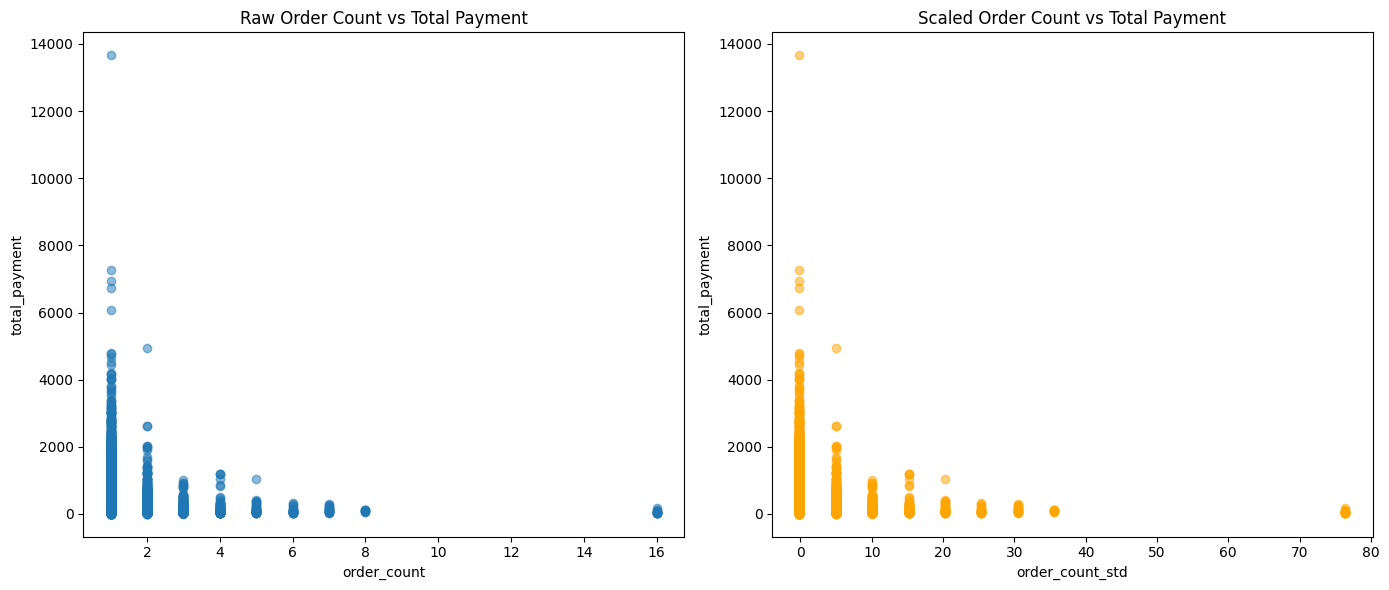

In [981]:
import matplotlib.pyplot as plt

# Create figure with 2 subplots
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Scatter 1: Raw order_count vs total_payment
axes[0].scatter(merged_dataset_feature_engineered_onecat['order_count'], merged_dataset_feature_engineered_onecat['total_payment'], alpha=0.5)
axes[0].set_title('Raw Order Count vs Total Payment')
axes[0].set_xlabel('order_count')
axes[0].set_ylabel('total_payment')

# Scatter 2: Scaled order_count vs total_payment
axes[1].scatter(merged_dataset_feature_engineered_onecat['order_count_std'], merged_dataset_feature_engineered_onecat['total_payment'], alpha=0.5, color='orange')
axes[1].set_title('Scaled Order Count vs Total Payment')
axes[1].set_xlabel('order_count_std')
axes[1].set_ylabel('total_payment')

plt.tight_layout()
plt.show()

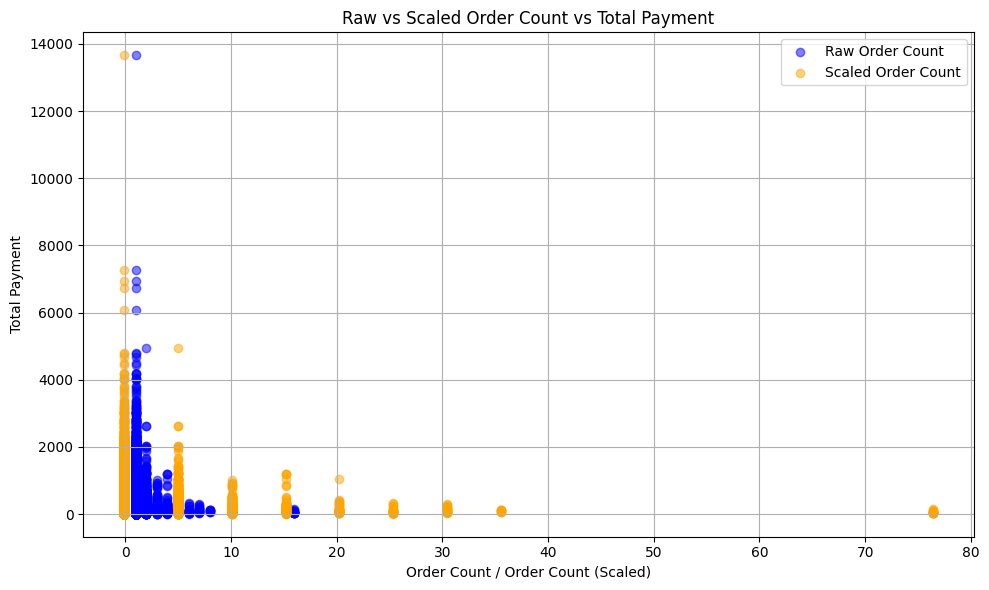

In [982]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# Raw order_count vs total_payment (blue)
plt.scatter(
    merged_dataset_feature_engineered_onecat['order_count'], 
    merged_dataset_feature_engineered_onecat['total_payment'], 
    alpha=0.5, 
    label='Raw Order Count',
    color='blue'
)

# Scaled order_count_std vs total_payment (orange)
plt.scatter(
    merged_dataset_feature_engineered_onecat['order_count_std'], 
    merged_dataset_feature_engineered_onecat['total_payment'], 
    alpha=0.5, 
    label='Scaled Order Count',
    color='orange'
)

plt.title('Raw vs Scaled Order Count vs Total Payment')
plt.xlabel('Order Count / Order Count (Scaled)')
plt.ylabel('Total Payment')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

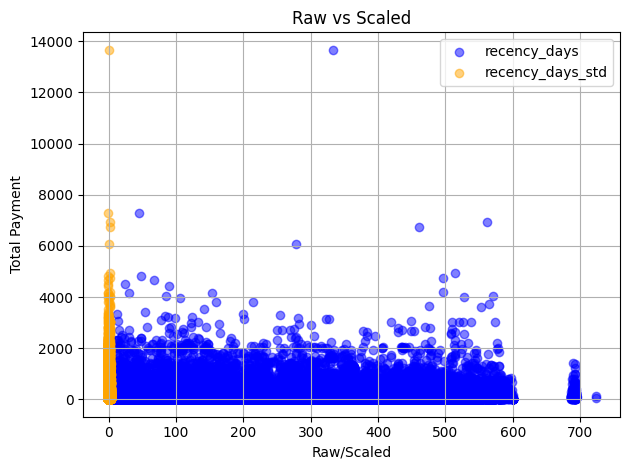

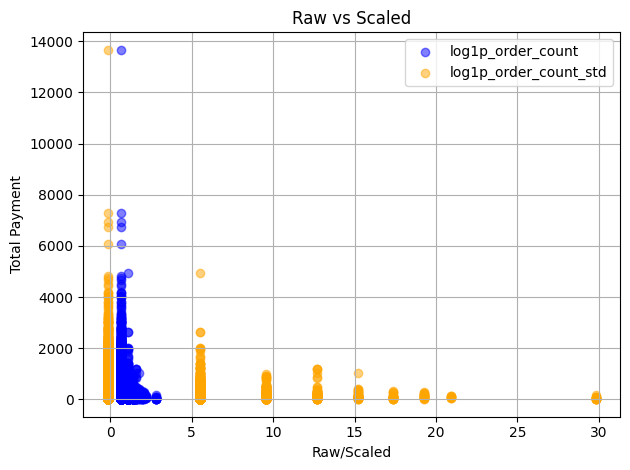

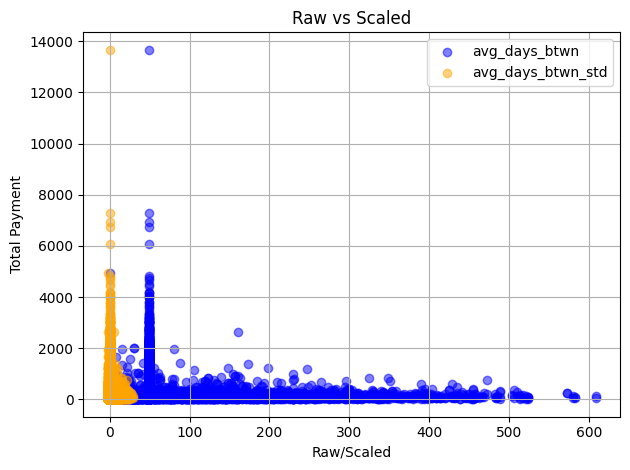

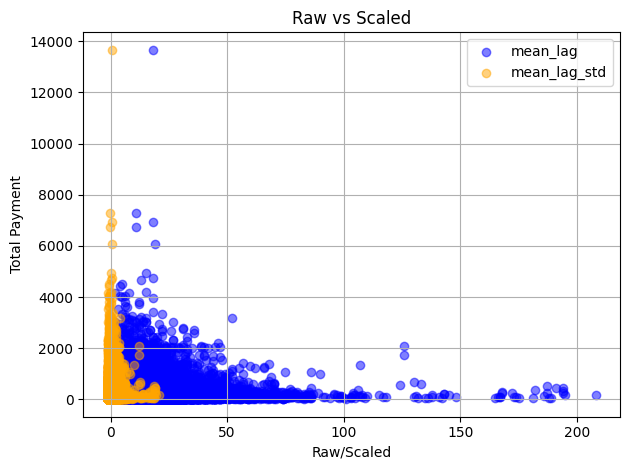

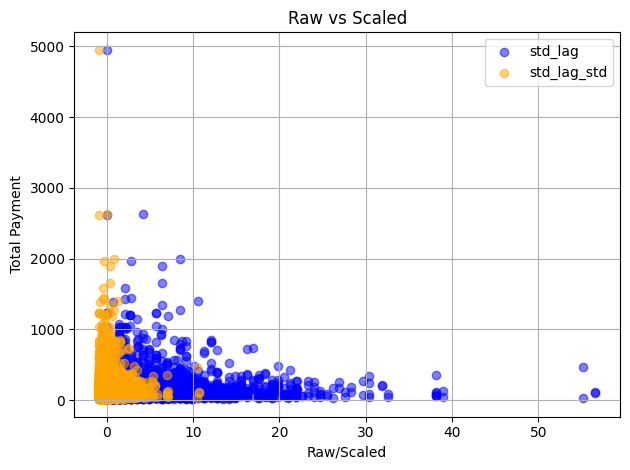

In [983]:
comparison ={
    "recency_days":"recency_days_std",
    "log1p_order_count": "log1p_order_count_std",
   "avg_days_btwn" :'avg_days_btwn_std', 
    'mean_lag':'mean_lag_std', 
   "std_lag" :'std_lag_std'
}
for original, scaled in comparison.items():
    plt.scatter(
        merged_dataset_feature_engineered_onecat[original], 
        merged_dataset_feature_engineered_onecat['total_payment'], 
        alpha=0.5, 
        label=original,
        color='blue'
    )

    # Scaled order_count_std vs total_payment (orange)
    plt.scatter(
        merged_dataset_feature_engineered_onecat[scaled], 
        merged_dataset_feature_engineered_onecat['total_payment'], 
        alpha=0.5, 
        label=scaled,
        color='orange'
    )

    plt.title('Raw vs Scaled')
    plt.xlabel('Raw/Scaled')
    plt.ylabel('Total Payment')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

In [984]:
merged_dataset_feature_engineered_onecat["recency_days_std"].value_counts()

recency_days_std
 0.255985    847
 0.262516    724
 0.242923    418
 0.236392    406
-0.815083    367
            ... 
 2.339342      5
 2.345873      5
 2.352404      4
 3.168767      2
 2.985902      1
Name: count, Length: 612, dtype: int64

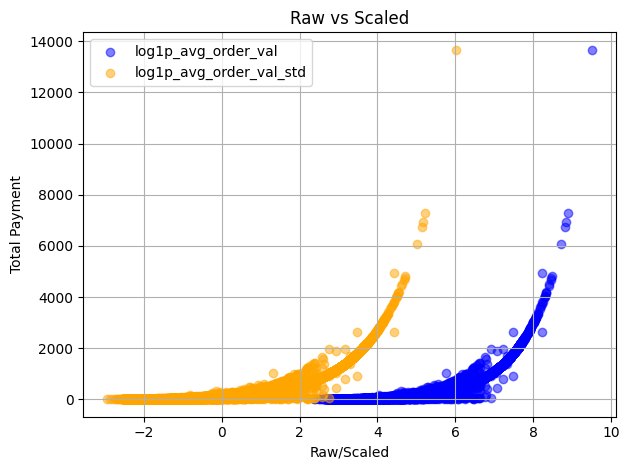

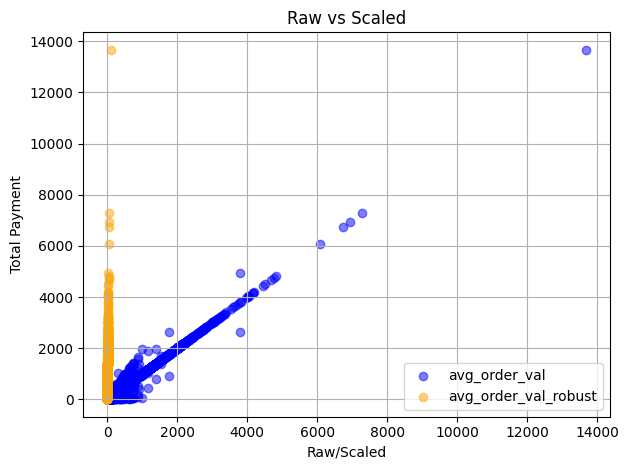

In [985]:
comparison ={
   "log1p_avg_order_val" :"log1p_avg_order_val_std",
   "avg_order_val" :"avg_order_val_robust"
}
for original, scaled in comparison.items():
    plt.scatter(
        merged_dataset_feature_engineered_onecat[original], 
        merged_dataset_feature_engineered_onecat['total_payment'], 
        alpha=0.5, 
        label=original,
        color='blue'
    )

    # Scaled order_count_std vs total_payment (orange)
    plt.scatter(
        merged_dataset_feature_engineered_onecat[scaled], 
        merged_dataset_feature_engineered_onecat['total_payment'], 
        alpha=0.5, 
        label=scaled,
        color='orange'
    )

    plt.title('Raw vs Scaled')
    plt.xlabel('Raw/Scaled')
    plt.ylabel('Total Payment')
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()